<a href="https://colab.research.google.com/github/Akanksha200008/SVDImageCompression/blob/main/SVD_Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem-3:** Singular Value Decomposition (SVD) can be effectively used to compress images. Suppose I is the pixel intensity matrix of a large image n×n. The transmission (or storage) of I requires O(n^2) numbers. Instead, one could use I_k, that is, the top k singular values σ_1,σ_2,…,σ_k along with the left and right singular vectors u_1,u_2,…,u_k and v_1,v_2,…,v_k. This would require using O(kn) real numbers instead of O(n^2) real numbers. If k is much smaller than n, this results in substantial savings.
In this problem, you will explore SVD compression on the flower.bmp image we have provided. In addition to your answers to each question, you should also submit your Matlab or Python code and required plots where necessary. Hint: You may ﬁnd the Matlab or Python SVD command/function particularly useful for this problem.

**(a)**

*   Use MATLAB or Python to read in flower.bmp
*   convert it to grayscale and ‘double’ format.


*   Apply SVD and give the top 10 singular values.
*   Generate a plot for all singular values versus their rankings

**What do you notice from this plot?**

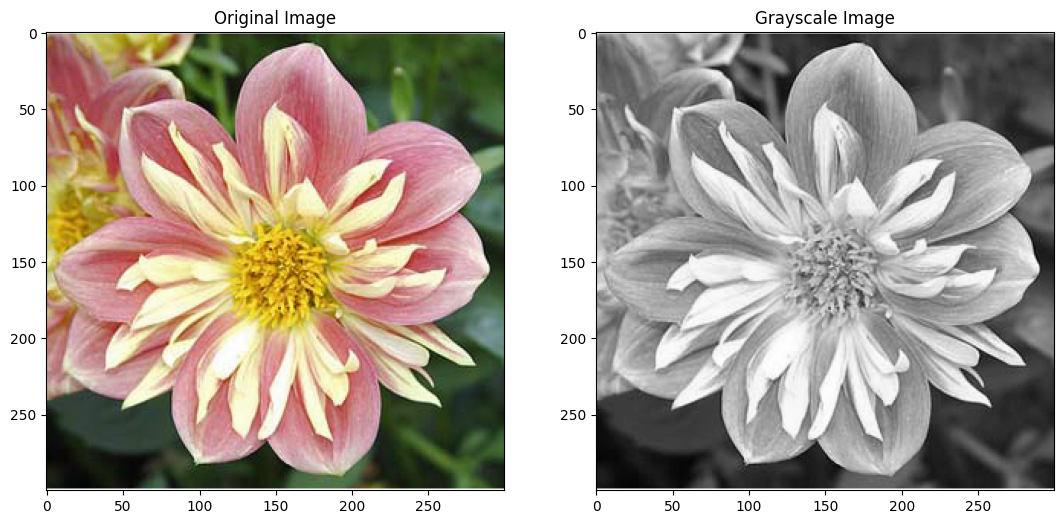

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import io
from skimage import color
from scipy.linalg import svd
from PIL import Image

# Load the original image
original_image = 'https://raw.githubusercontent.com/Akanksha200008/SVDImageCompression/refs/heads/main/flower.bmp'
converted_image = io.imread(original_image)

# Convert the image to grayscale using PIL
image_pil = Image.fromarray(converted_image)
gray_image = image_pil.convert('L')

# Converting to 'double' format (float64)
double_grayimage = np.array(gray_image, dtype=np.float64)

# Plot the original and grayscale images side by side
plt.figure(figsize=(13, 7))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(converted_image)
plt.title('Original Image')

# Grayscale Image
plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.show()

Top 10 singular values: [44672.44317785  6623.04978507  5165.76573636  3874.63924701
  3328.37404936  3068.85744276  2852.74009497  2773.00396818
  2650.80268819  2455.23325984]


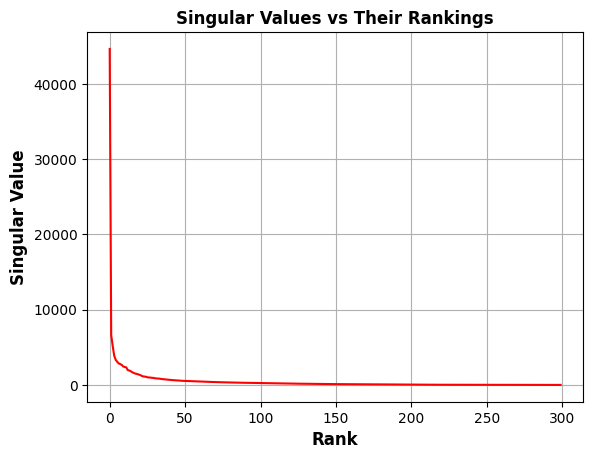

In [2]:
# Applying SVD
U, sigma, V = svd(double_grayimage, full_matrices=False)

# Getting the top 10 singular values
top_10_singular_values = sigma[:10]
print("Top 10 singular values:", top_10_singular_values)

# Plotting all singular values
plt.figure()
plt.plot(sigma,color='red')
plt.title('Singular Values vs Their Rankings',fontsize=12,fontweight='bold')
plt.xlabel('Rank',fontsize=12,fontweight='bold')
plt.ylabel('Singular Value',fontsize=12,fontweight='bold')
plt.grid(True)
plt.show()

**Singluar value distribution:** The plot shows that the singular values drop off very quickly. The first singular value is much larger than the subsequent ones, and after the top 10 to 20 values, the singular values become relatively small.
This rapid decay indicates that most of the image’s information is captured in the first few singular values, while the rest contribute less and less to the overall detail of the image.

---



**b)**	Verify that you can reconstruct and display the image using the three SVD matrices. Then, perform compression by using only the top k singular values and their corresponding left/right singular vectors.

Let k = 10, 50, and 100. Reconstruct and print the compressed images for the three diﬀerent values of k. Brieﬂy describe what you observe.

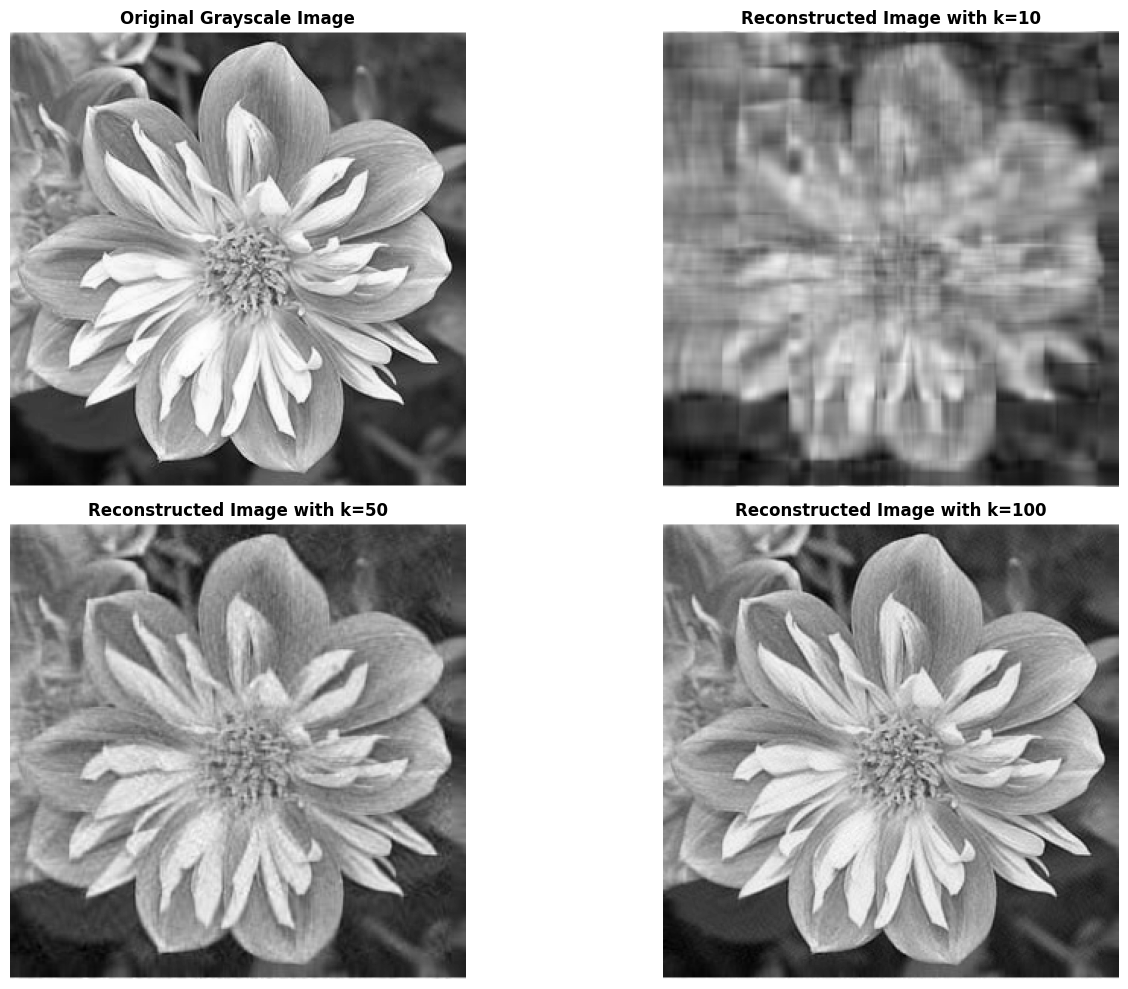

In [3]:

# Function to reconstruct image using top k singular values
def reconstruct_image(U, sigma, V, k):
    Sigma_k = np.diag(sigma[:k])
    U_k = U[:, :k]  # First k columns of U
    V_k = V[:k, :]  # First k rows of V
    return np.dot(U_k, np.dot(Sigma_k, V_k))

k_values = [10, 50, 100]
plt.figure(figsize=(15, 10))

# Plot the original grayscale image first
plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image',fontweight='bold')
plt.axis('off')

# Plot reconstructed images with different k values
for i, k in enumerate(k_values, 2):
    compressed_image = reconstruct_image(U, sigma, V, k)
    plt.subplot(2, 2, i)
    plt.imshow(compressed_image, cmap='gray')
    plt.title(f'Reconstructed Image with k={k}',fontweight='bold')
    plt.axis('off')

plt.tight_layout()
plt.show()

Since the singular values decay rapidly, using only the top
k singular values (like k=10,50,100) should still retain most of the essential details of the image.

1.  For k=10 you can expect a somewhat blurry reconstruction because only the most significant information is captured.
2. For k=50 and k=100, the image will retain finer details, as more singular values contribute to the reconstruction.

As k increases, the quality of the reconstructed image improves, but at the cost of more storage. The goal of Singular Value Decomposition (SVD)-based compression is to find a good balance between reducing the number of singular values used (which lowers storage needs) and maintaining acceptable image quality.

**c)** Instead of transmitting the original (grayscale) image, you can perform SVD compression on it and transmit only the top k singular values and the corresponding left/right singular vectors. This should be much smaller than the original image for low values of k. With this speciﬁc image, will we still save space by compressing when k = 200? Show why or why not.

Original image size: 90000 values
Compressed image size with k=20: 12020 values
Compression saves space for k=20.
Compressed image size with k=50: 30050 values
Compression saves space for k=50.
Compressed image size with k=120: 72120 values
Compression saves space for k=120.
Compressed image size with k=150: 90150 values
Compression does not save space for k=150.
Compressed image size with k=200: 120200 values
Compression does not save space for k=200.


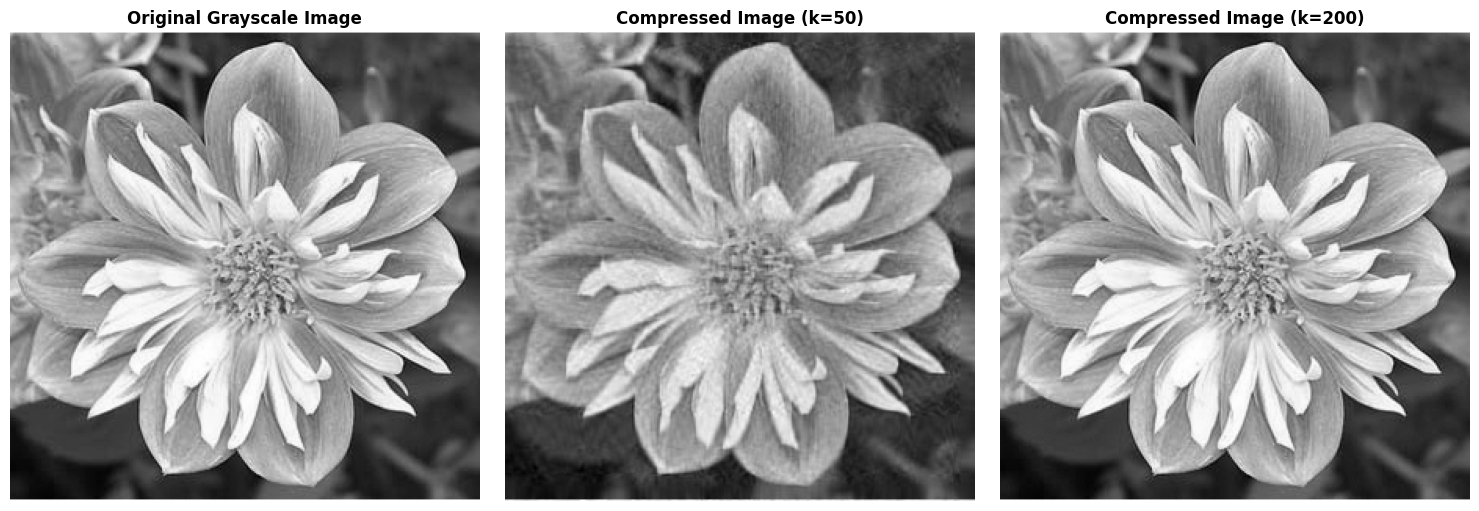

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.linalg import svd

# Perform SVD on the grayscale image
U, sigma, Vt = svd(double_grayimage, full_matrices=False)

k_values = [20, 50, 120, 150, 200]

# Get the original image size
M, N = double_grayimage.shape
original_size = M * N
print(f"Original image size: {original_size} values")

plt.figure(figsize=(15, 5))

# Plot the original grayscale image
plt.subplot(1, 3, 1)
plt.imshow(double_grayimage, cmap='gray')
plt.title('Original Grayscale Image', fontweight='bold')
plt.axis('off')

# Loop through different k values to compute compressed image size and reconstruction
for i, k in enumerate(k_values):
    # Get the top k components
    U_k = U[:, :k]
    s_k = sigma[:k]
    Vt_k = Vt[:k, :]

    # Reconstruct the image using top k singular values/vectors
    S_k = np.diag(s_k)
    compressed_image = np.dot(U_k, np.dot(S_k, Vt_k))

    # Compute the compressed image size using SVD
    compressed_size = k * (M + N + 1)
    print(f"Compressed image size with k={k}: {compressed_size} values")

    # Compare sizes
    if compressed_size < original_size:
        print(f"Compression saves space for k={k}.")
    else:
        print(f"Compression does not save space for k={k}.")

    # Plot for k=50 and k=200
    if k == 50:
        plt.subplot(1, 3, 2)
        plt.imshow(compressed_image, cmap='gray')
        plt.title(f'Compressed Image (k={k})', fontweight='bold')
        plt.axis('off')

    elif k == 200:
        plt.subplot(1, 3, 3)
        plt.imshow(compressed_image, cmap='gray')
        plt.title(f'Compressed Image (k={k})', fontweight='bold')
        plt.axis('off')

# Display the plots
plt.tight_layout()
plt.show()


**Conclusion:** The original image size (90,000 values) is less than the compressed image size (120,200 values) when k=200. Thus, at k=200, SVD compression is not space-saving. The reason is that storing the singular values and matrices (U, Σ, and V) for high k values adds more data than the original image contains. Compression is only effective for smaller k values, such as k=20,50,100,120 where the compressed size is significantly smaller and still retains a good amount of image detail.You can compress the image and keep much of its important information by using only the top 𝑘 singular values and their accompanying vectors.
